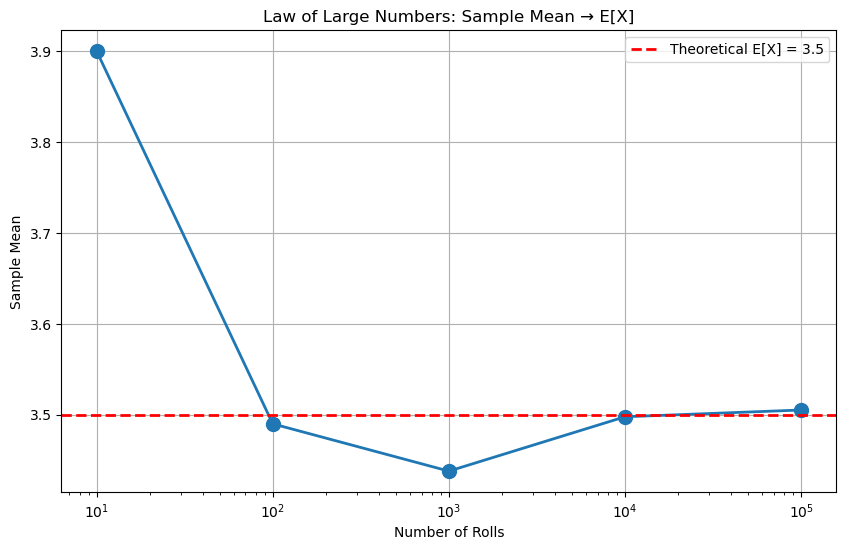

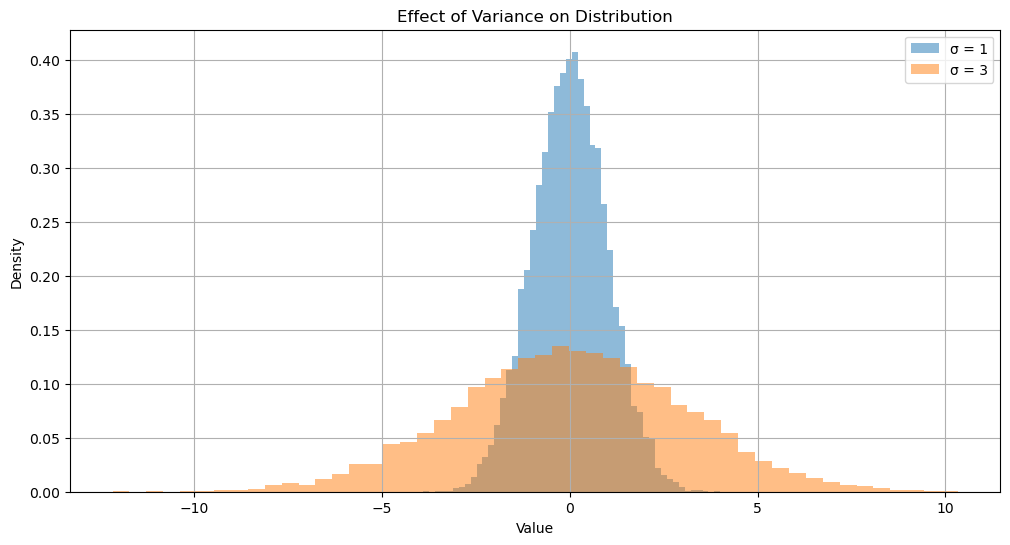

Low variance data: mean=0.002, std=0.994
High variance data: mean=0.015, std=3.028
Property: E[aX + b] = a*E[X] + b
E[X] = 4.987
E[3X + 10] = 24.962
3*E[X] + 10 = 24.962
Match: True

Property: Var(aX + b) = a²*Var(X)
Var(X) = 3.989
Var(3X + 10) = 35.901
9*Var(X) = 35.901
Match: True

Property: Var(X + Y) = Var(X) + Var(Y) for independent X, Y
Var(X) = 4.033
Var(Y) = 9.071
Var(X + Y) = 12.859
Var(X) + Var(Y) = 13.104
Match: False


In [7]:
import numpy as np
import matplotlib.pyplot as plt


## Exercise 1: Understanding Expectation (Mean)

# Expectation E[X] = "average value" if we repeated experiment many times



n_rolls = np.array([10, 100, 1000, 10000, 100000])
means = []

for n in n_rolls:
    rolls = np.random.randint(1, 7, size=n)
    means.append(np.mean(rolls))

plt.figure(figsize=(10, 6))
plt.semilogx(n_rolls, means, 'o-', markersize=10, linewidth=2)
plt.axhline(3.5, color='red', linestyle='--', linewidth=2, label='Theoretical E[X] = 3.5')
plt.xlabel('Number of Rolls')
plt.ylabel('Sample Mean')
plt.title('Law of Large Numbers: Sample Mean → E[X]')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 2: Variance and Standard Deviation

# Variance Var(X) = E[(X - E[X])²]
# Standard Deviation σ = sqrt(Var(X))


n_samples = 10000

data_low_var = np.random.normal(0, 1, n_samples)    # σ = 1
data_high_var = np.random.normal(0, 3, n_samples)   # σ = 3

plt.figure(figsize=(12, 6))
plt.hist(data_low_var, bins=50, alpha=0.5, density=True, label='σ = 1')
plt.hist(data_high_var, bins=50, alpha=0.5, density=True, label='σ = 3')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Effect of Variance on Distribution')
plt.legend()
plt.grid(True)
plt.show()

print(f"Low variance data: mean={np.mean(data_low_var):.3f}, std={np.std(data_low_var):.3f}")
print(f"High variance data: mean={np.mean(data_high_var):.3f}, std={np.std(data_high_var):.3f}")



## Exercise 3: Properties of Expectation and Variance

# Property 1: E[aX + b] = a*E[X] + b
X = np.random.normal(5, 2, 10000)
a, b = 3, 10

print("Property: E[aX + b] = a*E[X] + b")
print(f"E[X] = {np.mean(X):.3f}")
print(f"E[3X + 10] = {np.mean(3*X + 10):.3f}")
print(f"3*E[X] + 10 = {3*np.mean(X) + 10:.3f}")
print(f"Match: {np.isclose(np.mean(3*X + 10), 3*np.mean(X) + 10)}")
print()

# Property 2: Var(aX + b) = a²*Var(X)  (note: b disappears!)
print("Property: Var(aX + b) = a²*Var(X)")
print(f"Var(X) = {np.var(X):.3f}")
print(f"Var(3X + 10) = {np.var(3*X + 10):.3f}")
print(f"9*Var(X) = {9*np.var(X):.3f}")
print(f"Match: {np.isclose(np.var(3*X + 10), 9*np.var(X))}")
print()

# Property 3: For independent X, Y: Var(X + Y) = Var(X) + Var(Y)
X = np.random.normal(0, 2, 10000)
Y = np.random.normal(0, 3, 10000)  # Independent of X

print("Property: Var(X + Y) = Var(X) + Var(Y) for independent X, Y")
print(f"Var(X) = {np.var(X):.3f}")
print(f"Var(Y) = {np.var(Y):.3f}")
print(f"Var(X + Y) = {np.var(X + Y):.3f}")
print(f"Var(X) + Var(Y) = {np.var(X) + np.var(Y):.3f}")
print(f"Match: {np.isclose(np.var(X + Y), np.var(X) + np.var(Y), atol=0.1)}")

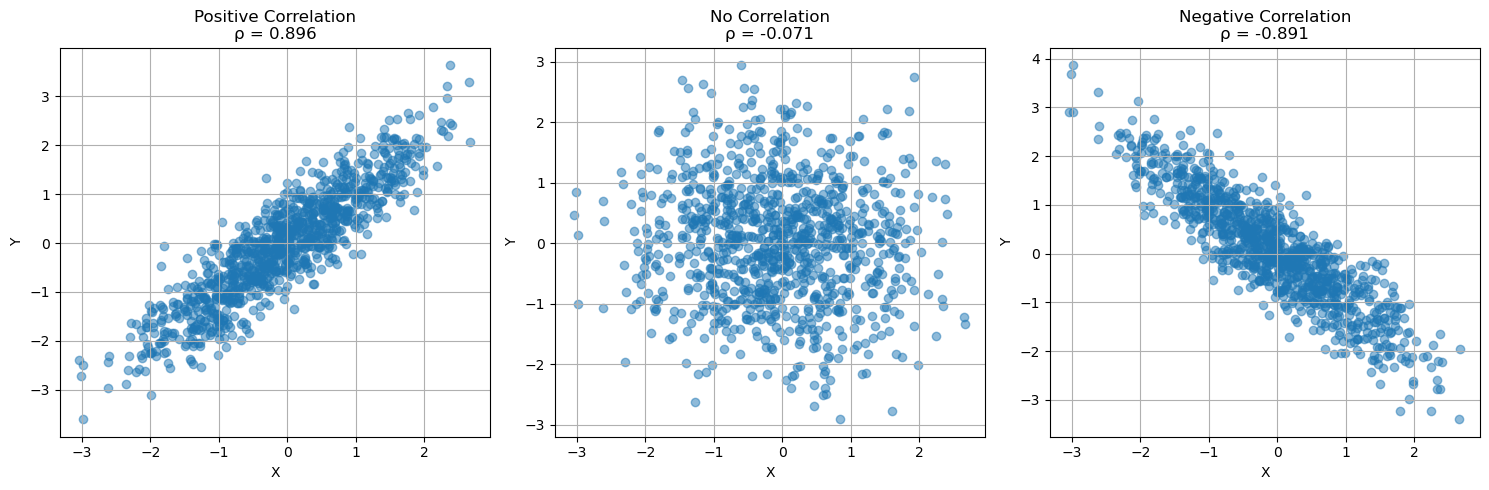

In [8]:
## Exercise 4: Covariance and Correlation

# Covariance: Cov(X, Y) = E[(X - E[X])(Y - E[Y])]
# Correlation: ρ = Cov(X, Y) / (σ_X * σ_Y)

# Generate correlated data
n = 1000
X = np.random.normal(0, 1, n)

# Y positively correlated with X
Y_positive = X + np.random.normal(0, 0.5, n)

# Y negatively correlated with X
Y_negative = -X + np.random.normal(0, 0.5, n)

# Y independent of X
Y_independent = np.random.normal(0, 1, n)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X, Y_positive, alpha=0.5)
axes[0].set_title(f'Positive Correlation\nρ = {np.corrcoef(X, Y_positive)[0,1]:.3f}')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].grid(True)

axes[1].scatter(X, Y_independent, alpha=0.5)
axes[1].set_title(f'No Correlation\nρ = {np.corrcoef(X, Y_independent)[0,1]:.3f}')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].grid(True)

axes[2].scatter(X, Y_negative, alpha=0.5)
axes[2].set_title(f'Negative Correlation\nρ = {np.corrcoef(X, Y_negative)[0,1]:.3f}')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')
axes[2].grid(True)

plt.tight_layout()
plt.show()

